In [1]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
start = dt.datetime(2012, 6, 1)
end = dt.datetime(2022, 3, 9)

stock = ['fb']
stock_data = pdr.get_data_yahoo(stock, start, end)

pair = ['snap']
pair_data = pdr.get_data_yahoo(pair, start, end)



In [3]:
main_df = pd.DataFrame()
pair_df = pd.DataFrame()

main_df["Close"] = stock_data[["Close"]]
main_df["Open"] = stock_data[["Open"]]
main_df["High"] = stock_data[["High"]]
main_df["Low"] = stock_data[["Low"]]
main_df["Volume"] = stock_data[["Volume"]]
main_df["stock_prev_close"] = main_df["Close"].shift(1)
main_df['Date'] = main_df.index

pair_df["Close"] = pair_data[["Close"]]
pair_df["Open"] = pair_data[["Open"]]
pair_df["High"] = pair_data[["High"]]
pair_df["Low"] = pair_data[["Low"]]
pair_df["Volume"] = pair_data[["Volume"]]
pair_df["pair_prev_close"] = pair_df["Close"].shift(1)
pair_df['Date'] = pair_df.index


In [4]:
merged = pd.merge(main_df.reset_index(drop=True), pair_df.reset_index(drop=True), on=["Date"], how="left")

In [5]:
merged

,Close_x,Open_x,High_x,Low_x,Volume_x,stock_prev_close,Date,Close_y,Open_y,High_y,Low_y,Volume_y,pair_prev_close
0,27.719999,28.889999,29.150000,27.389999,41855500,NaN,2012-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1,26.900000,27.200001,27.650000,26.440001,35230300,27.719999,2012-06-04,NaN,NaN,NaN,NaN,NaN,NaN
2,25.870001,26.700001,27.760000,25.750000,42473400,26.900000,2012-06-05,NaN,NaN,NaN,NaN,NaN,NaN
3,26.809999,26.070000,27.170000,25.520000,61489200,25.870001,2012-06-06,NaN,NaN,NaN,NaN,NaN,NaN
4,26.309999,27.000000,27.350000,26.150000,26159500,26.809999,2012-06-07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,202.970001,209.020004,209.080002,201.419998,27263500,208.110001,2022-03-03,35.660000,37.299999,37.419998,35.009998,23087700.0,37.369999
2455,200.059998,202.369995,205.889999,198.789993,32130900,202.970001,2022-03-04,33.090000,36.389999,36.720001,32.889999,22212700.0,35.660000
2456,187.470001,200.789993,200.889999,187.279999,38560600,200.059998,2022-03-07,30.219999,33.150002,33.340000,30.190001,32356700.0,33.090000
2457,190.289993,187.850006,196.699997,186.110001,37508100,187.470001,2022-03-08,31.219999,30.010000,32.720001,29.580000,28109600.0,30.219999


In [6]:
merged['ratio_spread'] = merged['Close_x'] / merged['Close_y']
merged['prev_ratio_spread'] = merged['ratio_spread'].shift(1)
merged['close_spread'] = np.log(merged['Close_x']) - np.log(merged['Close_y'])
merged['close_spread_sma20'] = merged['close_spread'].rolling(20).mean()
merged['close_spread_std20'] = merged['close_spread'].rolling(20).std()
merged['zscore'] = (merged['close_spread'] - merged['close_spread_sma20']) / merged['close_spread_std20']
merged['prev_zscore'] = merged['zscore'].shift(1)
merged['lsr'] = np.log(merged['ratio_spread']) - np.log(merged['prev_ratio_spread'])
merged['strat_return'] = merged['prev_zscore'] * -1 * (merged['lsr'] - np.log(merged['ratio_spread']))

In [7]:
merged

,Close_x,Open_x,High_x,Low_x,Volume_x,stock_prev_close,Date,Close_y,Open_y,High_y,...,pair_prev_close,ratio_spread,prev_ratio_spread,close_spread,close_spread_sma20,close_spread_std20,zscore,prev_zscore,lsr,strat_return
0,27.719999,28.889999,29.150000,27.389999,41855500,NaN,2012-06-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26.900000,27.200001,27.650000,26.440001,35230300,27.719999,2012-06-04,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.870001,26.700001,27.760000,25.750000,42473400,26.900000,2012-06-05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26.809999,26.070000,27.170000,25.520000,61489200,25.870001,2012-06-06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26.309999,27.000000,27.350000,26.150000,26159500,26.809999,2012-06-07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,202.970001,209.020004,209.080002,201.419998,27263500,208.110001,2022-03-03,35.660000,37.299999,37.419998,...,37.369999,5.691812,5.568906,1.739029,1.739140,0.131899,-0.000845,-0.275062,0.021830,-0.472337
2455,200.059998,202.369995,205.889999,198.789993,32130900,202.970001,2022-03-04,33.090000,36.389999,36.720001,...,35.660000,6.045935,5.691812,1.799386,1.715480,0.044967,1.865969,-0.000845,0.060358,-0.001470
2456,187.470001,200.789993,200.889999,187.279999,38560600,200.059998,2022-03-07,30.219999,33.150002,33.340000,...,33.090000,6.203508,6.045935,1.825115,1.716376,0.047022,2.312481,1.865969,0.025729,3.357598
2457,190.289993,187.850006,196.699997,186.110001,37508100,187.470001,2022-03-08,31.219999,30.010000,32.720001,...,30.219999,6.095131,6.203508,1.807490,1.717687,0.049240,1.823799,2.312481,-0.017625,4.220544


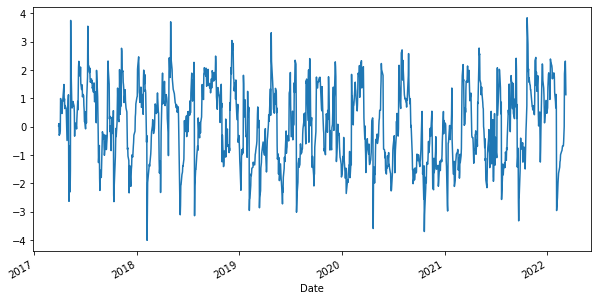

In [8]:
figsize=(10,5)
ax = merged.plot(x="Date", y="zscore", legend=False,figsize=figsize)

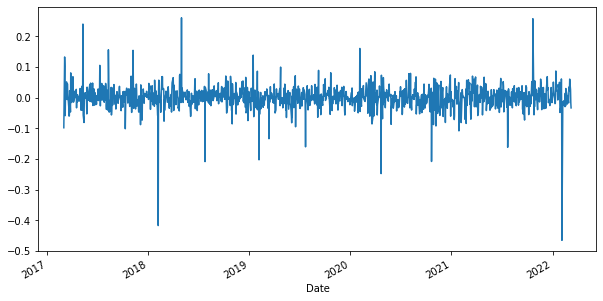

In [9]:
figsize=(10,5)
ax = merged.plot(x="Date", y="lsr", legend=False,figsize=figsize)

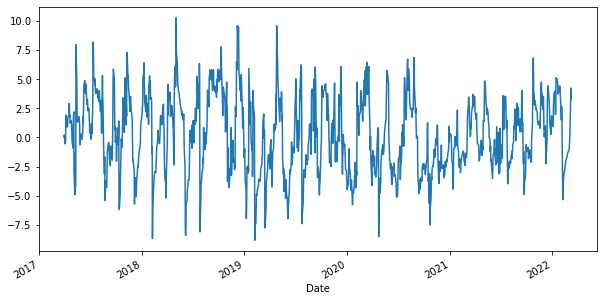

In [10]:
figsize=(10,5)
ax = merged.plot(x="Date", y="strat_return", legend=False,figsize=figsize)

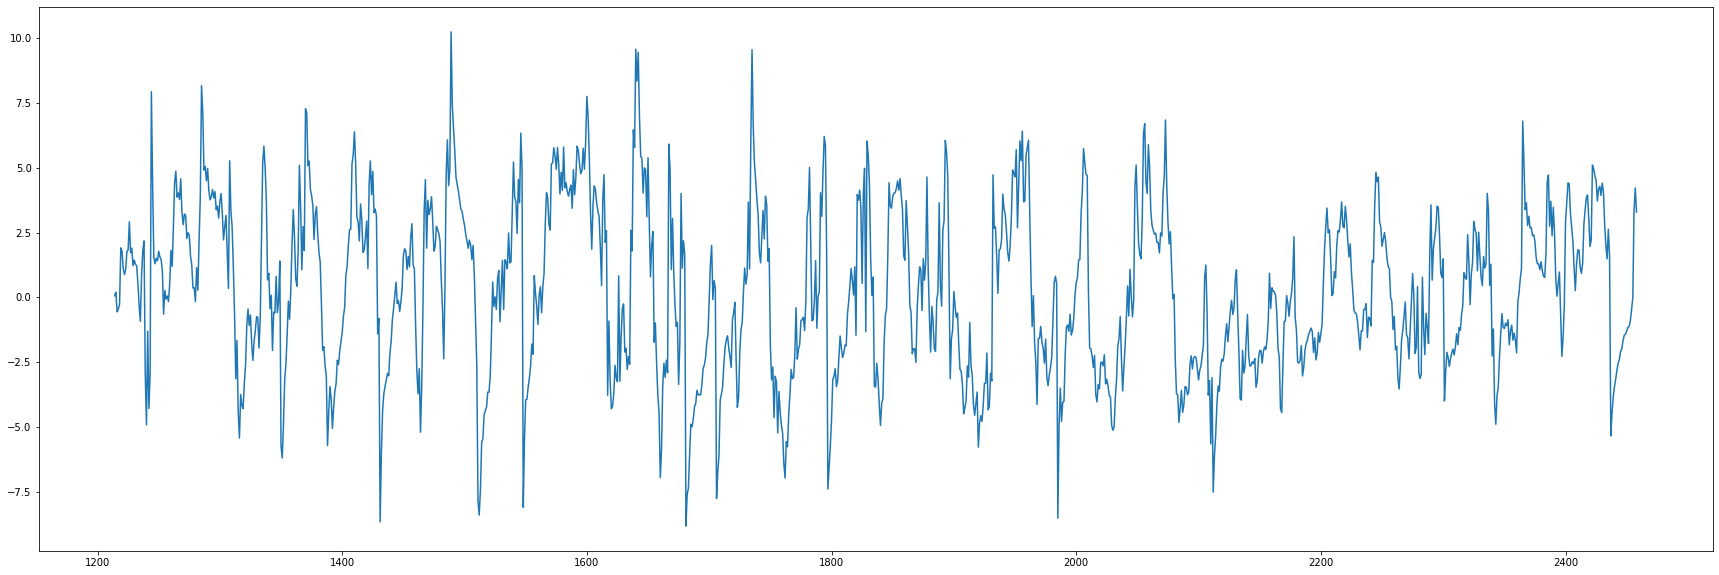

In [11]:
figsize=(30,10)
ax = merged[1200:].plot(y="strat_return", legend=False,figsize=figsize)


# Monthly Aggregates - Work in Progress

In [12]:
merged['date_trunc_month'] = merged.apply(lambda x: dt.datetime.strftime(x['Date'],'%Y-%m'), axis=1)

In [13]:
merged['date_trunc_month']

0       2012-06
1       2012-06
2       2012-06
3       2012-06
4       2012-06
         ...   
2454    2022-03
2455    2022-03
2456    2022-03
2457    2022-03
2458    2022-03
Name: date_trunc_month, Length: 2459, dtype: object

In [52]:
merged['is_start_of_month'] = merged.apply(lambda x: x.name == min(merged[merged['date_trunc_month'] == x['date_trunc_month']].index), axis=1)

In [56]:
merged[merged['is_start_of_month'] == True]

,Close_x,Open_x,High_x,Low_x,Volume_x,stock_prev_close,Date,Close_y,Open_y,High_y,...,prev_ratio_spread,close_spread,close_spread_sma20,close_spread_std20,zscore,prev_zscore,lsr,strat_return,date_trunc_month,is_start_of_month
0,27.719999,28.889999,29.150000,27.389999,41855500,NaN,2012-06-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-06,True
21,30.770000,31.250000,31.730000,30.549999,14122000,31.100000,2012-07-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-07,True
42,20.879999,21.500000,21.580000,20.840000,44604400,21.709999,2012-08-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-08,True
65,17.730000,18.080000,18.270000,17.549999,46622400,18.059999,2012-09-04,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-09,True
84,21.990000,22.080000,22.590000,21.730000,51262700,21.660000,2012-10-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,329.980011,326.040009,333.450012,326.000000,31518900,323.570007,2021-11-01,53.980000,52.990002,54.110001,...,6.153861,1.810418,1.588455,0.149923,1.480520,1.723058,-0.006661,3.130933,2021-11,True
2391,310.600006,330.290009,330.500000,310.290009,30329600,324.459991,2021-12-01,47.259998,49.130001,50.980000,...,6.814955,1.882842,1.865718,0.042765,0.400403,1.294139,-0.036278,2.483606,2021-12,True
2413,338.540009,338.299988,341.079987,337.190002,14537900,336.350006,2022-01-03,46.590000,47.630001,47.709999,...,7.151818,1.983256,1.945001,0.057268,0.668002,0.472042,0.015890,0.928679,2022-01,True
2433,319.000000,314.559998,319.660004,312.119995,18023800,313.260010,2022-02-01,33.660000,34.130001,34.200001,...,9.626921,2.248881,2.180036,0.103881,0.662735,0.878561,-0.015682,1.989558,2022-02,True


```sql
SELECT
    startofmonth,
    stock1,
    stock2,
    SUM(lsr) as lsr
FROM dailyreturns
GROUP BY
    startofmonth,
    stock1,
    stock2
```

In [60]:
merged[(merged['is_start_of_month'] == True)][['date_trunc_month','lsr']]

,date_trunc_month,lsr
0,2012-06,NaN
21,2012-07,NaN
42,2012-08,NaN
65,2012-09,NaN
84,2012-10,NaN
...,...,...
2370,2021-11,-0.006661
2391,2021-12,-0.036278
2413,2022-01,0.015890
2433,2022-02,-0.015682


<AxesSubplot:>

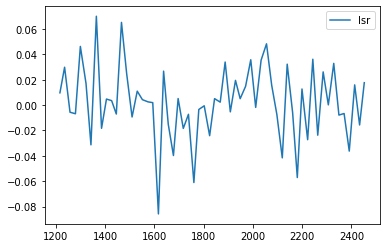

In [61]:
merged[(merged['is_start_of_month'] == True)][['date_trunc_month','lsr']].plot()

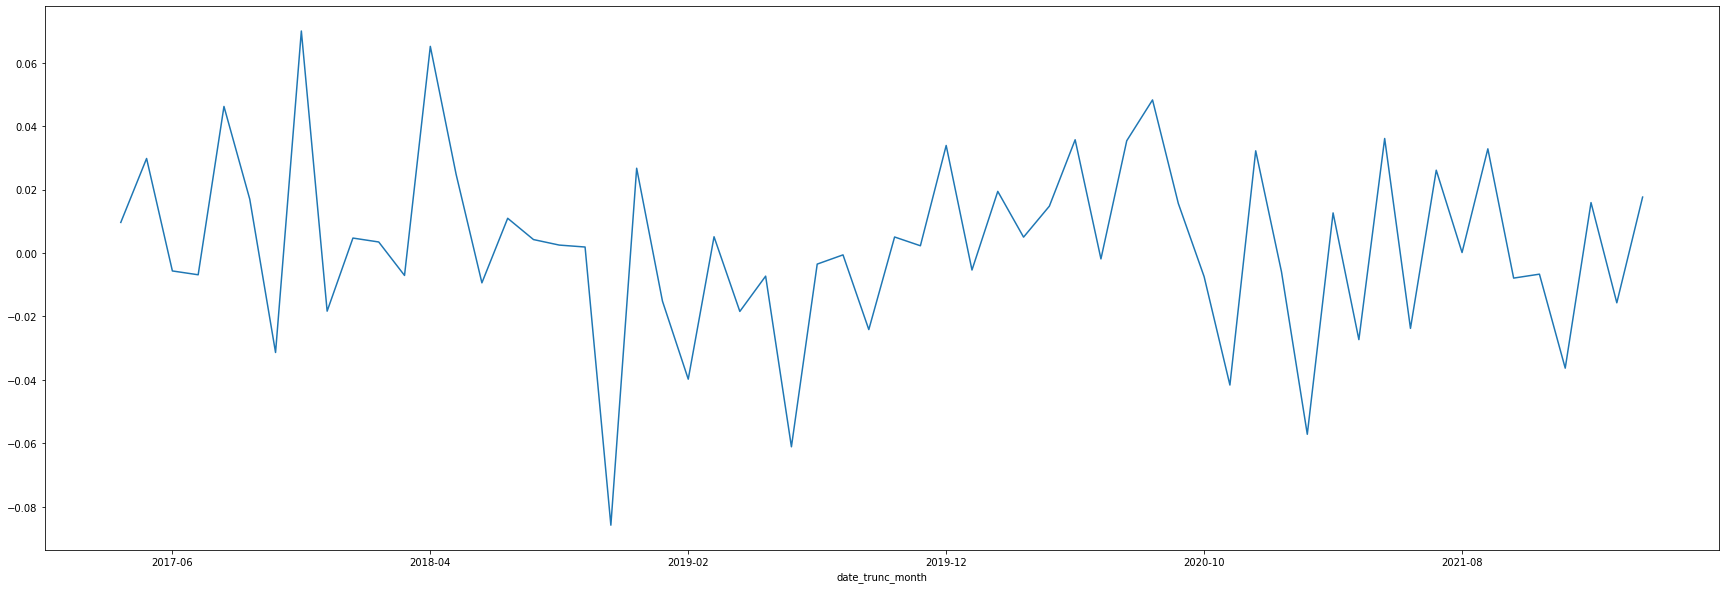

In [84]:
figsize=(30,10)
ax = merged[(merged['is_start_of_month'] == True)].plot(y="lsr", x="date_trunc_month", legend=False,figsize=figsize)
